In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covidvaccine-tweets/covidvaccine.csv


In [2]:
data = pd.read_csv("/kaggle/input/covidvaccine-tweets/covidvaccine.csv")
data.head()

/tmp/ipykernel_18/3232977801.py:1: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/kaggle/input/covidvaccine-tweets/covidvaccine.csv")


user_name              user_location  \
0                 MyNewsNE                      Assam   
1            Shubham Gupta                        NaN   
2  Journal of Infectiology                        NaN   
3                     Zane                        NaN   
4       Ann-Maree O’Connor  Adelaide, South Australia   

                                    user_description      user_created  \
0  MyNewsNE a dedicated multi-lingual media house...  24-05-2020 10:18   
1  I will tell about all experiences of my life f...  14-08-2020 16:42   
2  Journal of Infectiology (ISSN 2689-9981) is ac...  14-12-2017 07:07   
3                                  Fresher than you.  18-09-2019 11:01   
4  Retired university administrator. Melburnian b...  24-01-2013 14:53   

   user_followers user_friends user_favourites user_verified  \
0            64.0         11.0           110.0         False   
1             1.0         17.0             0.0         False   
2           143.0        566.0             8.0         False   
3            29.0         25.0           620.0         False   
4            83.0        497.0         10737.0         False   

               date                                               text  \
0  18-08-2020 12:55  Australia to Manufacture Covid-19 Vaccine and ...   
1  18-08-2020 12:55  #CoronavirusVaccine #CoronaVaccine #CovidVacci...   
2  18-08-2020 12:46  Deaths due to COVID-19 in Affected Countries\n...   
3  18-08-2020 12:45  @Team_Subhashree @subhashreesotwe @iamrajchoco...   
4  18-08-2020 12:45  @michellegrattan @ConversationEDU This is what...   

                                            hashtags               source  \
0                                   ['CovidVaccine']      Twitter Web App   
1  ['CoronavirusVaccine', 'CoronaVaccine', 'Covid...  Twitter for Android   
2                                                NaN      Twitter Web App   
3                                                NaN  Twitter for Android   
4                                                NaN      Twitter Web App   

  is_retweet  
0      False  
1      False  
2      False  
3      False  
4      False

In [3]:
#remove unneeded columns so data is easier to read

data = data.drop(columns=['user_description', 'user_created','user_followers','user_friends','user_favourites','source','is_retweet','user_verified','user_name'])
data.head()

user_location              date  \
0                      Assam  18-08-2020 12:55   
1                        NaN  18-08-2020 12:55   
2                        NaN  18-08-2020 12:46   
3                        NaN  18-08-2020 12:45   
4  Adelaide, South Australia  18-08-2020 12:45   

                                                text  \
0  Australia to Manufacture Covid-19 Vaccine and ...   
1  #CoronavirusVaccine #CoronaVaccine #CovidVacci...   
2  Deaths due to COVID-19 in Affected Countries\n...   
3  @Team_Subhashree @subhashreesotwe @iamrajchoco...   
4  @michellegrattan @ConversationEDU This is what...   

                                            hashtags  
0                                   ['CovidVaccine']  
1  ['CoronavirusVaccine', 'CoronaVaccine', 'Covid...  
2                                                NaN  
3                                                NaN  
4                                                NaN

In [4]:
#remove any rows with NaN values 
data = data.dropna()
data.describe()

user_location                 date  \
count             267141               267141   
unique             36286               262678   
top     Bengaluru, India  2021-07-20 13:30:00   
freq               17286                   13   

                                                     text          hashtags  
count                                              267141            267141  
unique                                             266918            113944  
top     Technically the world’s first #CovidVaccine is...  ['CovidVaccine']  
freq                                                   13             49136

In [5]:
# !pip install nltk

In [6]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

# Download the punkt and stopwords from nltk
nltk.download('stopwords')

# Get the stop words and punkt from nltk
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#method to create a bag of words given text
def tokenize(text):
    word_tokens =  word_tokenize(text)
    #Filter the word tokens
    filtered  =  [w for w in word_tokens if not w.lower() in stop_words and w.isalpha()]
    return filtered
    
# tokenize('this is a test of bag of words')

In [8]:
grouped_data = data.groupby('user_location')
grouped_data.describe()

date         \
                                                   count unique   
user_location                                                     
\nMilky way                                            1      1   
                                                      39     39   
                                                       1      1   
               23 ; she / her ; hail satan !! \...     1      1   
   Johannesburg Sandton                                1      1   
...                                                  ...    ...   
🦬                                                      1      1   
🧘🏾‍♂️🙏💛                                                1      1   
🧡🤍💚                                                    8      8   
🧸                                                      1      1   
🪐                                                      1      1   

                                                                              \
                                                                    top freq   
user_location                                                                  
\nMilky way                                         2021-02-24 06:12:28    1   
                                                       01-09-2020 21:44    1   
                                                    2021-06-23 17:53:56    1   
               23 ; she / her ; hail satan !! \...  2021-07-10 14:46:50    1   
   Johannesburg Sandton                             2020-12-28 12:10:44    1   
...                                                                 ...  ...   
🦬                                                   2021-08-04 14:56:20    1   
🧘🏾‍♂️🙏💛                                             2021-10-30 09:05:16    1   
🧡🤍💚                                                 2021-01-01 12:04:24    1   
🧸                                                   2022-02-05 10:53:37    1   
🪐                                                   2021-04-12 14:45:08    1   

                                                    text         \
                                                   count unique   
user_location                                                     
\nMilky way                                            1      1   
                                                      39     39   
                                                       1      1   
               23 ; she / her ; hail satan !! \...     1      1   
   Johannesburg Sandton                                1      1   
...                                                  ...    ...   
🦬                                                      1      1   
🧘🏾‍♂️🙏💛                                                1      1   
🧡🤍💚                                                    8      8   
🧸                                                      1      1   
🪐                                                      1      1   

                                                                                                       \
                                                                                                  top   
user_location                                                                                           
\nMilky way                                         The differences between Covid-19 vaccines, in ...   
                                                    The grateful world thanks you for partaking in...   
                                                    Namibia need to ask help from Germany.\n\nYou ...   
               23 ; she / her ; hail satan !! \...       got my chip installed today 💪🏻 #covidvaccine   
   Johannesburg Sandton                             Local is lekker, proudly Mzanian proudly Limpo...   
...                                                                                               ...   
🦬                                                   Why is NYC requiring proof of 1 dose of #Covid...   
🧘🏾‍

In [9]:
#for now, just work with USA location

states = ["Alabama" ,"Alaska" ,"Arizona" ,"Arkansas" ,"California" ,"Colorado" ,"Connecticut" ,"Delaware" ,"Florida" ,"Georgia" ,"Hawaii" ,"Idaho" ,
    "Illinois" ,"Indiana" ,"Iowa" ,"Kansas" ,"Kentucky" ,"Louisiana" ,"Maine" ,"Maryland" ,"Massachusetts" ,"Michigan" ,"Minnesota" ,"Mississippi" ,"Missouri" ,
    "Montana" ,"Nebraska", "Nevada" ,"New Hampshire" ,"New Jersey" ,"New Mexico" ,"New York" ,"North Carolina" ,"North Dakota" ,"Ohio" ,"Oklahoma" ,"Oregon" ,
    "Pennsylvania" ,"Rhode Island" ,"South Carolina" ,"South Dakota" ,"Tennessee" ,"Texas" ,"Utah" ,"Vermont" ,"Virginia" ,"Washington" ,"West Virginia" ,
    "Wisconsin" ,"Wyoming", "USA", "United States", "America", "United States of America", "US" ]

data['user_location'] = data['user_location'].str.lower()
states = [state.lower() for state in states]

usa_data = data[data['user_location'].isin(states)]

usa_data


user_location                 date  \
46      united states     18-08-2020 03:14   
84      united states     17-08-2020 17:52   
87      massachusetts     17-08-2020 16:42   
208               usa     16-08-2020 18:22   
308     united states     16-08-2020 01:02   
...               ...                  ...   
399506       new york  2022-09-06 19:04:48   
399524       michigan  2022-09-06 17:01:28   
399536  massachusetts  2022-09-06 15:08:23   
399546        alabama  2022-09-06 13:31:14   
399576        florida  2022-09-06 11:39:55   

                                                     text  \
46      Just so we’re clear on how I feel about a #cov...   
84      Just enrolled into a pivotal phase 3 clinical ...   
87      $GERN up 7% today.... It's either going to cur...   
208     #5G the silent killer just like #DirectedEnerg...   
308     Who had this on their 2020 bingo card? #vaccin...   
...                                                   ...   
399506  Many Young Kids With COVID Show No Symptoms of...   
399524  @cvspharmacy: I am honestly not sure how to an...   
399536  @maura_healey How is your investigation into t...   
399546  HUH? #Pfizer’s CEO implies mRNA technology was...   
399576  New vaccines get green light as University of ...   

                                                 hashtags  
46                                       ['covidvaccine']  
84                                       ['CovidVaccine']  
87                                        ['BloodCancer']  
208     ['5G', 'DirectedEnergyWeapons', 'SmartMeter', ...  
308               ['vaccines', 'COVID19', 'CovidVaccine']  
...                                                   ...  
399506  ['ASYMPTOMATICCOVID', 'CORONAVIRUS', 'COVID', ...  
399524                                   ['CovidVaccine']  
399536  ['BigPharma', 'InformedConsent', 'CovidVaccine...  
399546              ['Pfizer', 'COVID19', 'CovidVaccine']  
399576                        ['COVID19', 'CovidVaccine']  

[14196 rows x 4 columns]

In [10]:
USA_grouped_data = usa_data.groupby('user_location')
USA_grouped_data.describe()

date                                   text         \
                         count unique                  top freq count unique   
user_location                                                                  
alabama                     71     71  2020-12-29 23:19:17    1    71     71   
alaska                       8      8     17-09-2020 23:01    1     8      8   
america                     76     76     22-08-2020 05:30    1    76     76   
arizona                    173    173     14-08-2020 21:00    1   173    173   
arkansas                    48     48  2021-01-12 19:33:45    1    48     48   
california                 454    454     12-08-2020 04:02    1   454    454   
colorado                   141    141     12-08-2020 21:01    1   141    141   
connecticut                 80     80     07-09-2020 12:40    1    80     80   
delaware                   102    102  2020-12-30 15:04:40    1   102    102   
florida                    307    307     13-08-2020 00:38    1   307    307   
georgia                     60     60  2020-12-30 02:40:33    1    60     60   
hawaii                      13     13  2020-12-30 16:43:39    1    13     13   
idaho                       11     11  2021-01-15 14:16:10    1    11     11   
illinois                   116    116  2020-11-09 18:17:39    1   116    116   
indiana                     44     44  2020-12-31 15:02:59    1    44     44   
iowa                        51     50  2021-02-12 03:50:13    2    51     51   
kansas                      30     30  2020-12-30 17:40:47    1    30     30   
kentucky                    33     33  2020-12-30 22:07:46    1    33     33   
louisiana                   25     25  2020-12-30 21:00:35    1    25     25   
maine                       35     35     06-09-2020 22:45    1    35     35   
maryland                   109    108  2021-11-15 00:19:00    2   109    109   
massachusetts              134    134     17-08-2020 16:42    1   134    134   
michigan                   162    162     22-09-2020 19:59    1   162    162   
minnesota                  109    109     10-08-2020 19:59    1   109    109   
mississippi                 35     35     06-09-2020 19:56    1    35     35   
missouri                    17     17  2020-11-17 14:44:27    1    17     17   
montana                     14     14  2020-11-17 12:19:17    1    14     14   
nebraska                    11     11  2020-12-28 22:42:32    1    11     11   
nevada                      25     25  2021-01-14 20:04:12    1    25     25   
new hampshire               32     32  2021-01-22 13:32:35    1    32     32   
new jersey                 290    290     05-09-2020 17:29    1   290    290   
new mexico                  46     46  2020-11-09 14:31:32    1    46     46   
new york                  1012   1012     11-08-2020 16:06    1  1012   1012   
north carolina             172    172     07-09-2020 17:42    1   172    172   
north dakota                 7      7  2021-02-10 17:20:08    1     7      7   
ohio                       133    133     08-09-2020 20:28    1   133    133   
oklahoma                    38     38  2020-12-27 21:25:00    1    38     38   
oregon                      87     87     20-09-2020 00:59    1    87     87   
pennsylvania               101    101  2020-12-31 04:31:49    1   101    101   
rhode island                20     20  2020-10-13 12:07:37    1    20     20   
south carolina             127    127     06-09-2020 16:26    1   127    127   
south dakota                 9      9  2020-12-28 13:37:49    1     9      9   
tennessee                   52     52  2020-11-17 23:10:40    1    52     52   
texas                      366    364  2021-01-08 16:07:32    3   366    366   
united states             4646   4636  2021-08-09 00:36:08    3  4646   4646   
united states of america   129    129     21-09-2020 03:10    1   129    129   
us                          92     92     11-08-2020 15:01    1    92     92   
usa                       

In [11]:
import re
import string

def clean_text(text):
    print(text)
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text #from https://www.kaggle.com/code/alankritamishra/covid-19-tweet-sentiment-analysis
usa_data['text'] = usa_data['text'].apply(lambda x: clean_text(x))

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text) #from https://www.kaggle.com/code/alankritamishra/covid-19-tweet-sentiment-analysis
usa_data['text']=usa_data['text'].apply(lambda x: remove_emoji(x))


usa_data['text'] = usa_data['text'].apply(lambda x: tokenize(x))
usa_data.head()

Just so we’re clear on how I feel about a #covidvaccine https://t.co/0jSI8gGQKP
Just enrolled into a pivotal phase 3 clinical trial of COVID vaccine. Stay tuned for weekly updates. #CovidVaccine… https://t.co/wo0TKTwKuv
$GERN up 7% today.... It's either going to cure #BloodCancer or go go down in flames.... But I will wait...… https://t.co/wxZHvtsajV
#5G the silent killer just like #DirectedEnergyWeapons cause damage. #SmartMeter #Smartphone give off radiation.
Wi… https://t.co/14xoES03ut
Who had this on their 2020 bingo card? #vaccines #COVID19 #CovidVaccine  https://t.co/zsYVQl18El
@ChuckCallesto Hell fu king no. 
 #CovidVaccine
COVID Vaccines Are Making Progress https://t.co/RdSe5SKpO0 #COVIDVaccine #CoronavirusVaccine
As bad as a mandated #CovidVaccine would be, they could instead penalize people for not taking the vaccine, essenti… https://t.co/8i4hgoKO59
@nprpolitics I would rather DIE than get vaccinated! It’s my God Given and Constitutional Right! #CovidVaccine
A crackpot claim

/tmp/ipykernel_18/3597945287.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data['text'] = usa_data['text'].apply(lambda x: clean_text(x))
/tmp/ipykernel_18/3597945287.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data['text']=usa_data['text'].apply(lambda x: remove_emoji(x))
/tmp/ipykernel_18/3597945287.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

user_location              date  \
46   united states  18-08-2020 03:14   
84   united states  17-08-2020 17:52   
87   massachusetts  17-08-2020 16:42   
208            usa  16-08-2020 18:22   
308  united states  16-08-2020 01:02   

                                                  text  \
46                         [clear, feel, covidvaccine]   
84   [enrolled, pivotal, phase, clinical, trial, co...   
87   [gern, today, either, going, cure, bloodcancer...   
208  [silent, killer, like, directedenergyweapons, ...   
308              [bingo, card, vaccines, covidvaccine]   

                                              hashtags  
46                                    ['covidvaccine']  
84                                    ['CovidVaccine']  
87                                     ['BloodCancer']  
208  ['5G', 'DirectedEnergyWeapons', 'SmartMeter', ...  
308            ['vaccines', 'COVID19', 'CovidVaccine']

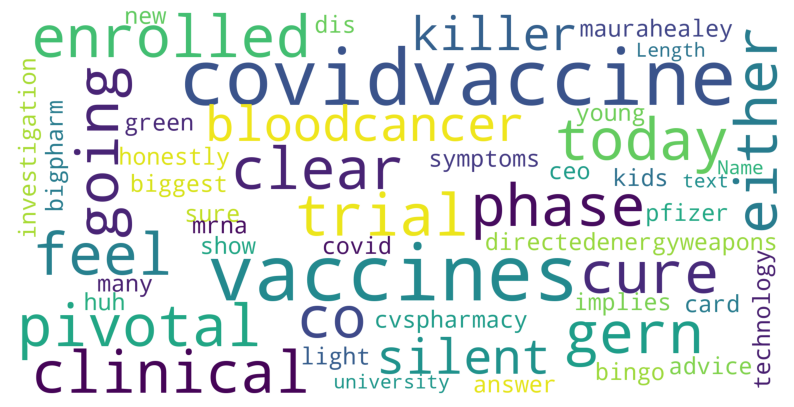

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(usa_data['text']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

In [13]:
# usa_data.head()

In [14]:
def extract_month(date):
    if (date[3:5])[1] == '-':
        return date[5:7]
    else:
        return date[3:5]

In [15]:
usa_data['month'] =''
usa_data['month'] = usa_data['date'].apply(lambda x: extract_month(x))
usa_data

/tmp/ipykernel_18/3417802219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data['month'] =''
/tmp/ipykernel_18/3417802219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data['month'] = usa_data['date'].apply(lambda x: extract_month(x))


user_location                 date  \
46      united states     18-08-2020 03:14   
84      united states     17-08-2020 17:52   
87      massachusetts     17-08-2020 16:42   
208               usa     16-08-2020 18:22   
308     united states     16-08-2020 01:02   
...               ...                  ...   
399506       new york  2022-09-06 19:04:48   
399524       michigan  2022-09-06 17:01:28   
399536  massachusetts  2022-09-06 15:08:23   
399546        alabama  2022-09-06 13:31:14   
399576        florida  2022-09-06 11:39:55   

                                                     text  \
46                            [clear, feel, covidvaccine]   
84      [enrolled, pivotal, phase, clinical, trial, co...   
87      [gern, today, either, going, cure, bloodcancer...   
208     [silent, killer, like, directedenergyweapons, ...   
308                 [bingo, card, vaccines, covidvaccine]   
...                                                   ...   
399506  [many, young, kids, covid, show, symptoms, dis...   
399524  [cvspharmacy, honestly, sure, answer, advice, ...   
399536  [maurahealey, investigation, biggest, bigpharm...   
399546  [huh, pfizer, ceo, implies, mrna, technology, ...   
399576  [new, vaccines, get, green, light, university,...   

                                                 hashtags month  
46                                       ['covidvaccine']    08  
84                                       ['CovidVaccine']    08  
87                                        ['BloodCancer']    08  
208     ['5G', 'DirectedEnergyWeapons', 'SmartMeter', ...    08  
308               ['vaccines', 'COVID19', 'CovidVaccine']    08  
...                                                   ...   ...  
399506  ['ASYMPTOMATICCOVID', 'CORONAVIRUS', 'COVID', ...    09  
399524                                   ['CovidVaccine']    09  
399536  ['BigPharma', 'InformedConsent', 'CovidVaccine...    09  
399546              ['Pfizer', 'COVID19', 'CovidVaccine']    09  
399576                        ['COVID19', 'CovidVaccine']    09  

[14196 rows x 5 columns]

In [16]:
usa1 = usa_data[usa_data.month == '01']
usa2 = usa_data[usa_data.month == '02']
usa3 = usa_data[usa_data.month == '03']
usa4 = usa_data[usa_data.month == '04']
usa5 = usa_data[usa_data.month == '05']
usa6 = usa_data[usa_data.month == '06']
usa7 = usa_data[usa_data.month == '07']
usa8 = usa_data[usa_data.month == '08']
usa9 = usa_data[usa_data.month == '09']
usa10 = usa_data[usa_data.month == '10']
usa11 = usa_data[usa_data.month == '11']
usa12 = usa_data[usa_data.month == '12']

In [17]:
def make_word_cloud(dataframe):
    word_cloud = WordCloud(
                        background_color='white',
#                         stopwords=set(STOPWORDS),
                        max_words=50,
                        max_font_size=40,
                        scale=5,
                        random_state=1).generate(str(dataframe['text']))
    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
#     print(dataframe['month'])
#     plt.title(dataframe['month'])
    fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()


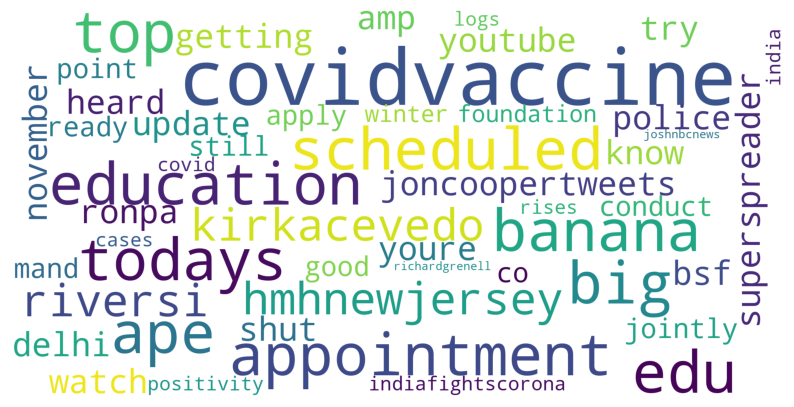

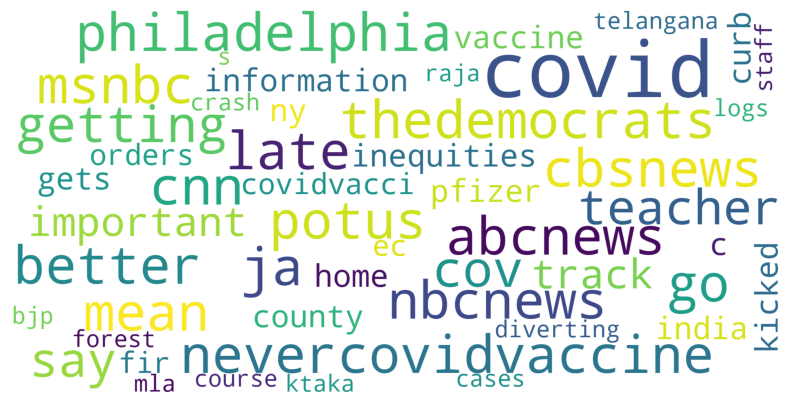

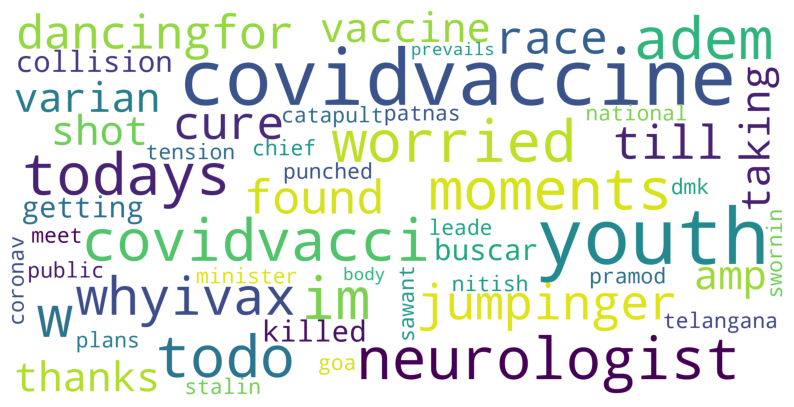

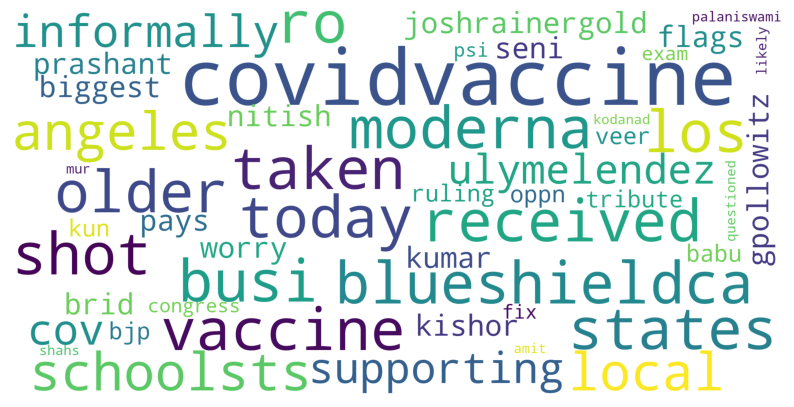

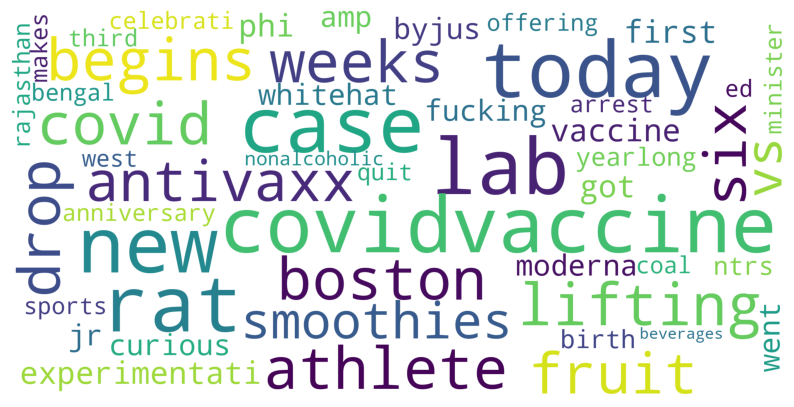

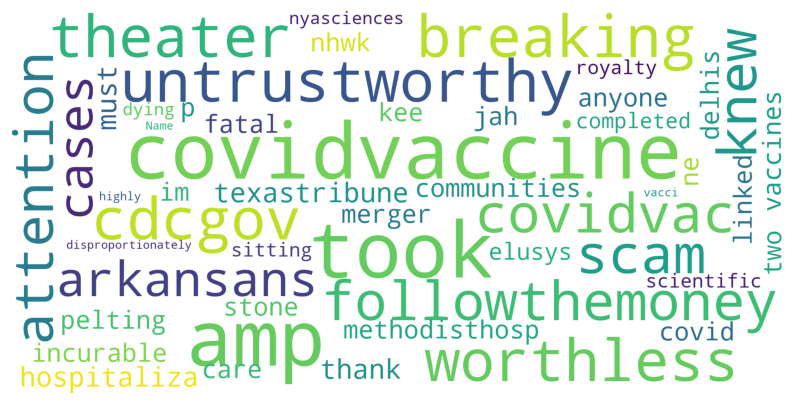

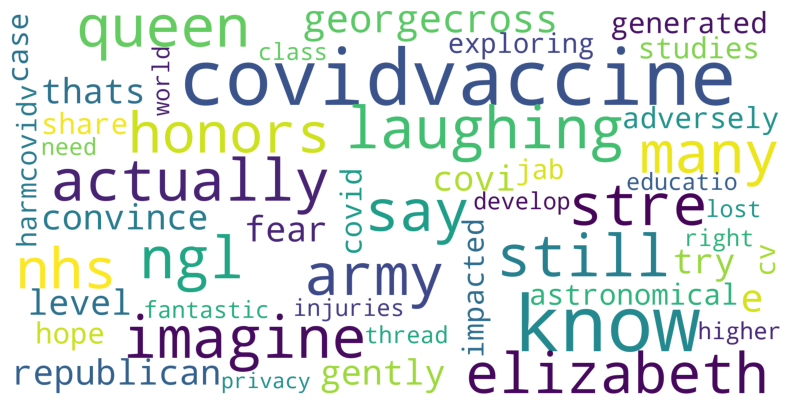

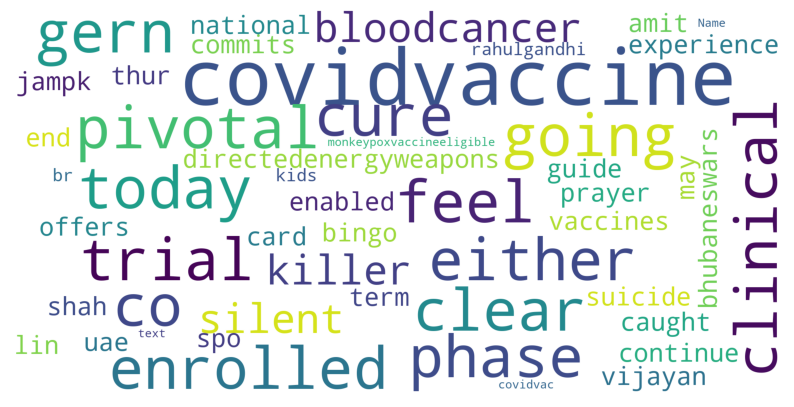

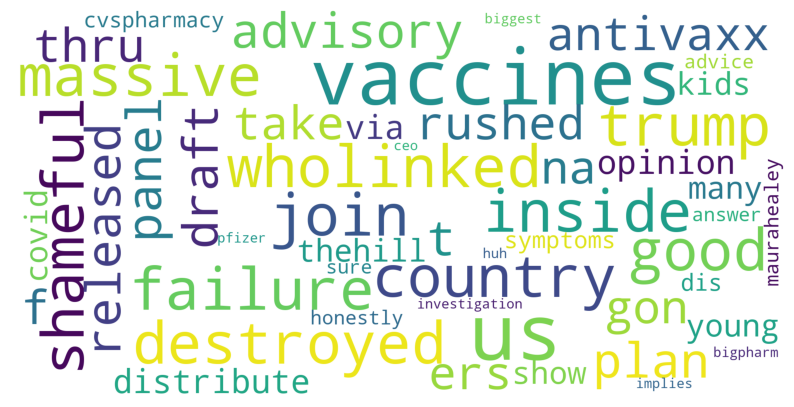

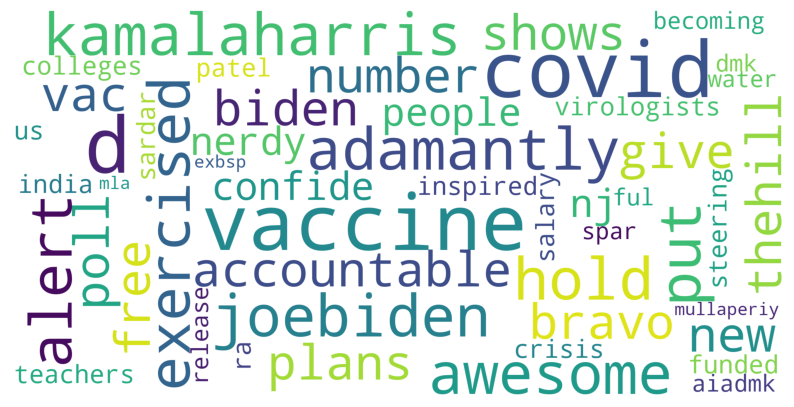

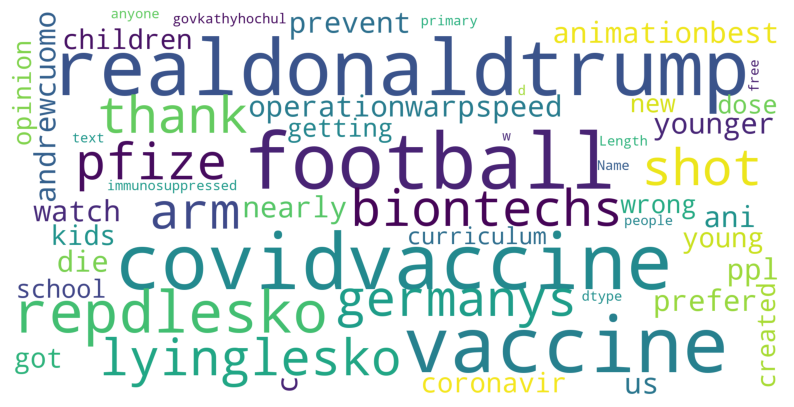

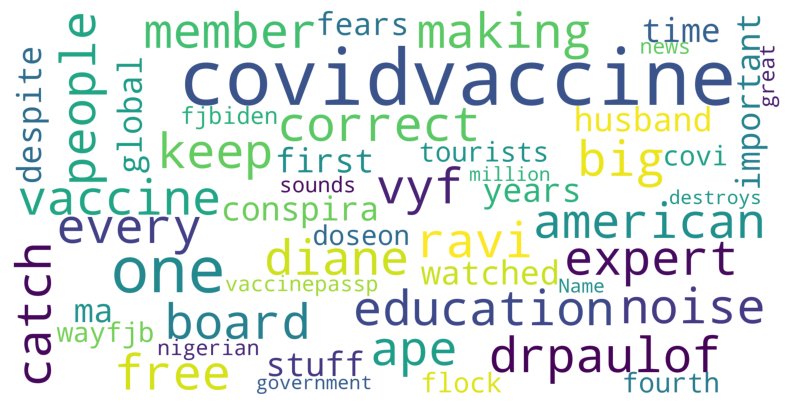

In [18]:
make_word_cloud(usa1)
make_word_cloud(usa2)
make_word_cloud(usa3)
make_word_cloud(usa4)
make_word_cloud(usa5)
make_word_cloud(usa6)
make_word_cloud(usa7)
make_word_cloud(usa8)
make_word_cloud(usa9)
make_word_cloud(usa10)
make_word_cloud(usa11)
make_word_cloud(usa12)
